In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define plot font sizes
label_font = 24
title_font = 28
legend_font = 18


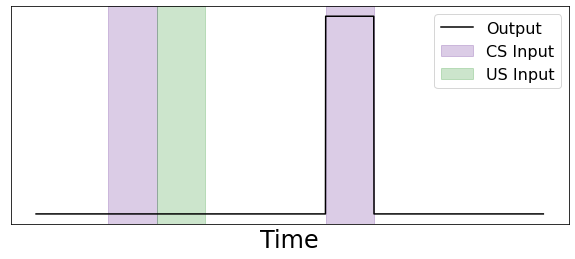

In [2]:
# CS-US Schematic
# Make data
T = 21
dt = 0.01
time = np.arange(0, T+dt, dt)
response = np.zeros(time.size)
cs_xs1 = np.arange(3, 6) // dt
cs_xs2 = np.arange(12, 15) // dt
us_xs = np.arange(5, 8) // dt
ys = np.array([-0.5, 2])
response[int(cs_xs2[0]):int(cs_xs2[-1])] = 1

# Plot schematic
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(response, 'k', label='Output')
# for i in range(cs_xs1.size):
#     ax.vlines(cs_xs1[i], ys[0], ys[1], 'b', alpha=0.5, linewidth=25)
#     ax.vlines(cs_xs2[i], ys[0], ys[1], 'b', alpha=0.5, linewidth=25)
#     ax.vlines(us_xs[i], ys[0], ys[1], 'r', alpha=0.5, linewidth=25)
ax.axvspan(cs_xs1[0], cs_xs1[-1], color='indigo', alpha=0.2, label='CS Input')
ax.axvspan(cs_xs2[0], cs_xs2[-1], color='indigo', alpha=0.2, label='_nolegend_')
ax.axvspan(us_xs[0], us_xs[-1], color='g', alpha=0.2, label='US Input')
ax.set_xlabel('Time', fontsize=24)
ax.set_xticks([])
ax.set_yticks([])
ax.legend(fontsize=16)


In [3]:
cs1 = np.zeros(20)
cs1[3:6] = 1
cs1[11:14] = 1
print(np.where(cs1)[0].squeeze())
print(np.diff(np.where(cs1)[0].squeeze()))
print(np.where(np.diff(cs1) == 1)[0])
print(cs1[np.where(np.diff(cs1) == 1)[0] + 1])


[ 3  4  5 11 12 13]
[1 1 6 1 1]
[ 2 10]
[1. 1.]


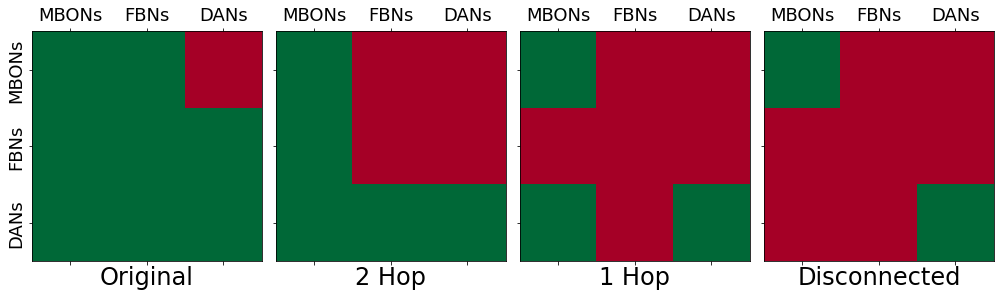

In [4]:
n_labels = ['MBONs', 'FBNs', 'DANs']
mat_labels = ['Original', '2 Hop', '1 Hop', 'Disconnected']
mat_hops = np.ones((4, 3, 3))
mat_hops[:, 0, -1] = 0
mat_hops[1:, :2, -2:] = 0
mat_hops[2:, 1, 0] = mat_hops[2:, -1, 1] = 0
mat_hops[-1, -1, 0] = 0

n_mats = len(mat_labels)
fig, axes = plt.subplots(1, n_mats, figsize=(14, 6), sharey=True)
for i in range(n_mats):
    axes[i].matshow(mat_hops[i, :, :], cmap='RdYlGn')
    axes[i].set_xlabel(mat_labels[i], fontsize=label_font)
    axes[i].set_xticks(np.arange(len(n_labels)))
    axes[i].set_xticklabels(n_labels, fontsize=legend_font)
axes[0].set_yticks(np.arange(len(n_labels)))
axes[0].set_yticklabels(n_labels, fontsize=legend_font, rotation='vertical', va='center')
fig.tight_layout();


Text(0.5, 1.0, '"Good Enough" Curve')

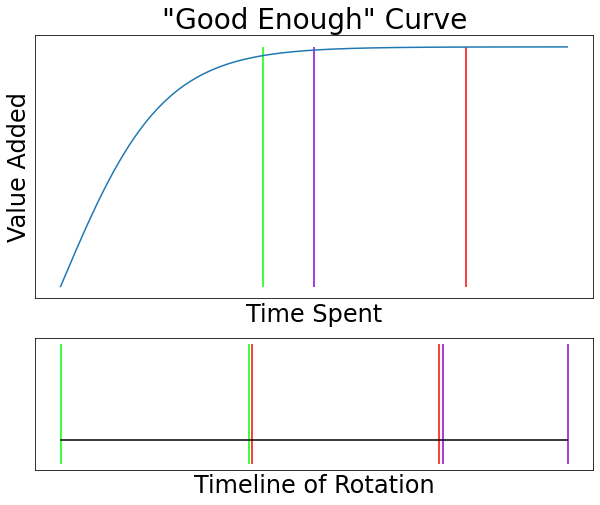

In [6]:
xs = np.arange(10e2) * 0.01
ys = 1 / (1 + np.exp(-xs))
vline_colours = ['lime', 'red', 'darkviolet']
vline_lims1 = [np.min(ys), np.max(ys)]
vline_lims2 = [0, 1]
vlines1 = [4, 8, 5]
vlines2 = [[0, 3.72], [3.78, 7.47], [7.53, 10]]
ys2 = np.zeros(xs.size) + 0.2
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
ax1.plot(xs, ys)
ax1.set_xticks([])
ax1.set_xlabel('Time Spent', fontsize=label_font)
ax1.set_yticks([])
ax1.set_ylabel('Value Added', fontsize=label_font)

ax2.plot(xs, ys2, 'k')
ax2.set_yticks([])
ax2.set_xlabel('Timeline of Rotation', fontsize=label_font)

for i in range(len(vline_colours)):
    ax1.vlines(vlines1[i], vline_lims1[0], vline_lims1[1], colors=vline_colours[i])
    ax2.vlines(vlines2[i][0], vline_lims2[0], vline_lims2[1], colors=vline_colours[i])
    ax2.vlines(vlines2[i][1], vline_lims2[0], vline_lims2[1], colors=vline_colours[i])

ax1.set_title('"Good Enough" Curve', fontsize=title_font)
